# Setup


In [2]:
# python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)
# scikit learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# commmon imports
import numpy as np
import os

# to maake this notebook outpuut stable accross runs
np.random.seed(42)

# set up plot 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

# where to save the figure
ROOT = '.'
CHAPTER_ID = 'svm'
IMAGES_PATH = os.path.join(ROOT,'images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + '.' +fig_extension)
    print('saving images figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris['data']
y = iris['target']

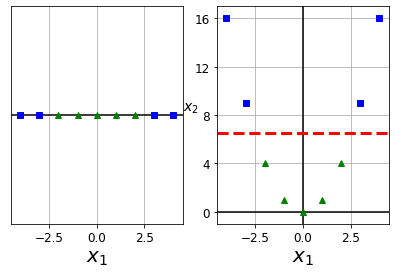

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]# make the data kuadratic

y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0,color='k')
plt.plot(X1D[:,0][y==0],np.zeros(4),'bs')
plt.plot(X2D[:,0][y==1],np.zeros(5),"g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$",fontsize=20)
plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(X2D[:,0][y==0],X2D[:,1][y==0],'bs')
plt.plot(X2D[:,0][y==1],X2D[:,1][y==1],"g^")
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=14,rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5,4.5], [6.5,6.5],"r--",linewidth=3)
plt.axis([-4.5,4.5,-1,17])

plt.subplots_adjust(right=1)

Pada hasil di kiri:
- data tidak dapat dipisahkan secara linear maka dari itu diperlukan lebih banyak fitur dengan logistic feature
- data di kanan sudah di konvert dengan logistic feature maka di peroleh data dapat dipisahkan sekarang dengan linear 

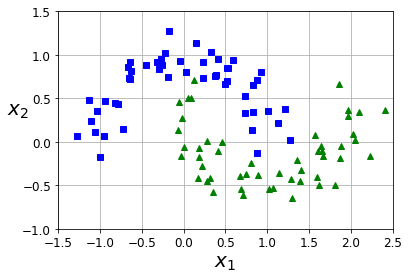

In [5]:
# menilai clasificasi dengan make mons
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plot_dataset(X,y,axes=[-1.5, 2.5, -1, 1.5])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing  import StandardScaler
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss='hinge',random_state = 42))
])
polynomial_svm_clf.fit(X,y)


d:\Materi_data-science\Code\Excercise SVM\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

saving images figure moons_poly_svc_plot


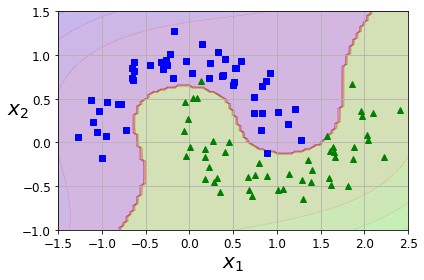

In [7]:
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X_plot = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X_plot).reshape(x0.shape)
    y_decision = clf.decision_function(X_plot).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)
    # return y_pred,y_decision
plot_prediction(polynomial_svm_clf,axes=[-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,axes=[-1.5, 2.5, -1, 1.5])
save_fig("moons_poly_svc_plot")
plt.show()
    

# Polynomial Kernel

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [24]:
# add the overfitting so for degree
poly100_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=10, coef0=100,C=5))
])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

saving images figure moons_kernelized_polynomial_svc_plot


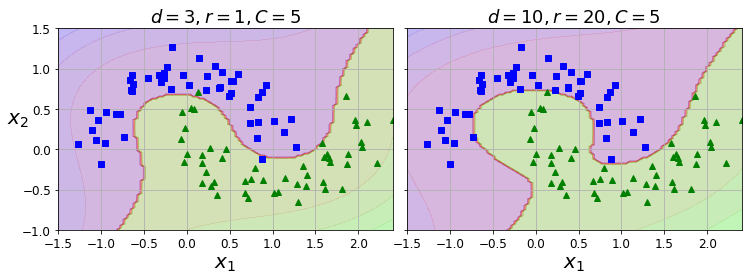

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4),sharey=True)

plt.sca(axes[0])
plot_prediction(poly_kernel_svm_clf,[-1.5,2.4,-1,1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_prediction(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=20, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()